In [1]:
%%capture
# this captures output
%pip install photomanagement/
%pip install matplotlib

In [2]:
import photomanagement
import pathlib

In [3]:
db = photomanagement.Database(path="./database")

**Adding Photos**
The following line addes photos in the directory given. Running it more than once will add them more than once.

In [4]:
db.add_images_from_directory(pathlib.Path("./photomanagement/images/animal_images"))

**Searching Photos**

The following cells show how to search photos using a textual query.

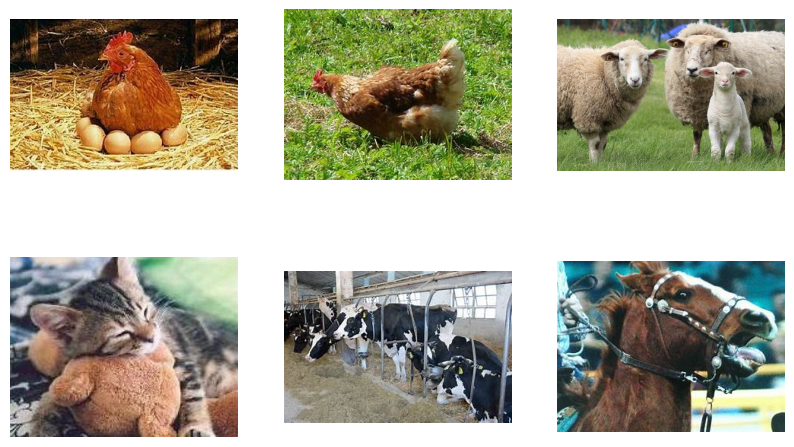

In [5]:
import matplotlib.pyplot as plt

results = db.query_with_text("eggs")

plt.figure(figsize=(10, 6))

for i in range(len(results)):
    plt.subplot(2, 3, i + 1)
    plt.imshow(results[i].data)
    plt.axis("off")

plt.show()

**Deleting Photos**

After running the following cells, the chicken with the eggs will be gone!

In [6]:
top_result = db.query_with_text("eggs")[0]

db.delete_images(top_result)

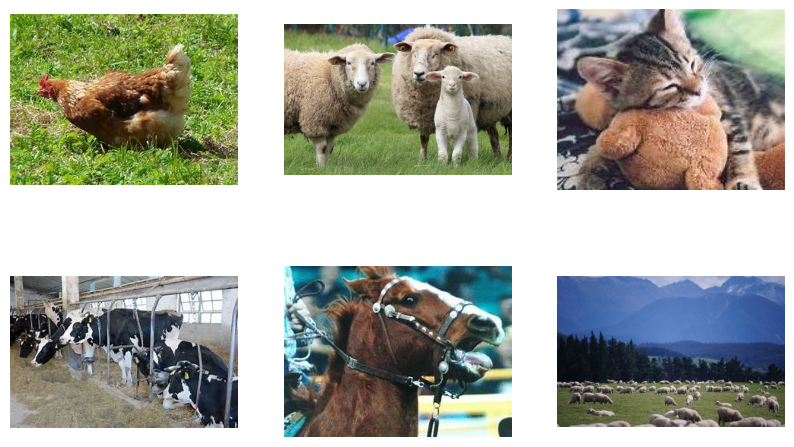

In [7]:
import matplotlib.pyplot as plt

results = db.query_with_text("eggs")

plt.figure(figsize=(10, 6))

for i in range(len(results)):
    plt.subplot(2, 3, i + 1)
    plt.imshow(results[i].data)
    plt.axis("off")

plt.show()

In [8]:
db.add_images_from_directory(pathlib.Path("./photomanagement/images/animal_images"))

**Search for Duplicates** \
The following cells have functionality for photos that are exact visually identical.

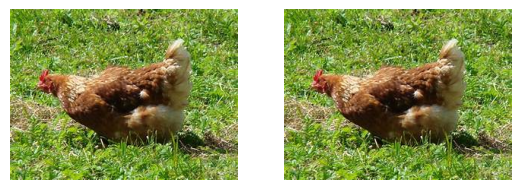

In [9]:
duplicates = db.scan_duplicates_for_photo(results[0])

plt.figure(figsize=(10, 6))

for i in range(len(duplicates)):
    plt.subplot(2, 3, i + 1)  # the number of images in the grid is 5*5 (25)
    plt.imshow(duplicates[i].data)
    plt.axis("off")

plt.show()

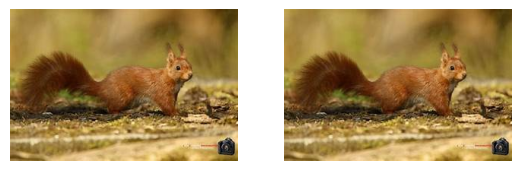

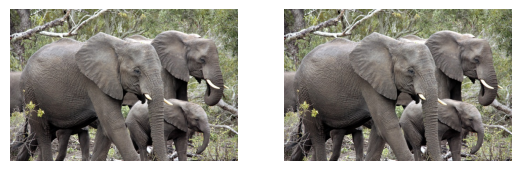

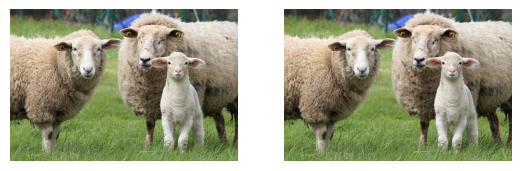

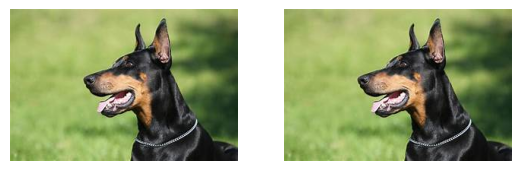

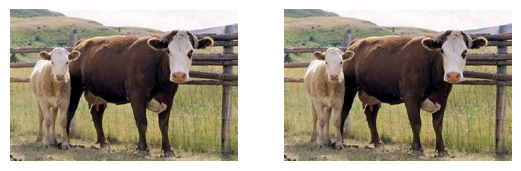

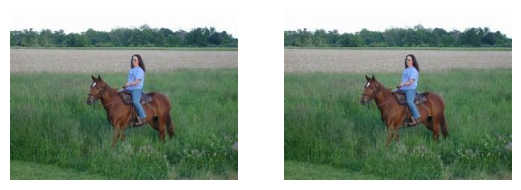

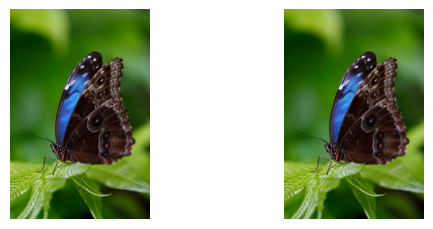

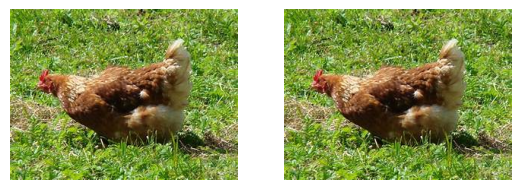

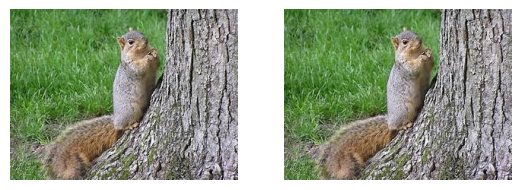

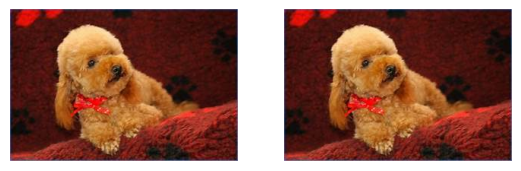

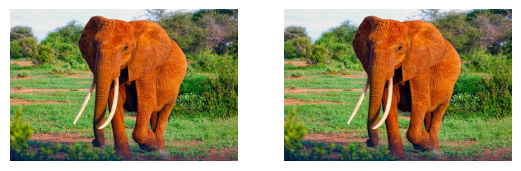

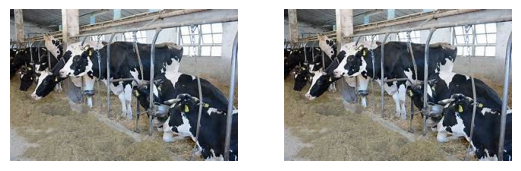

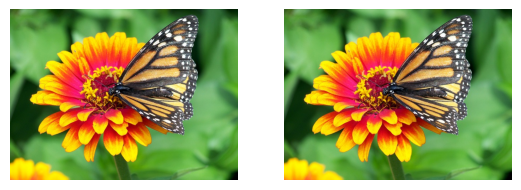

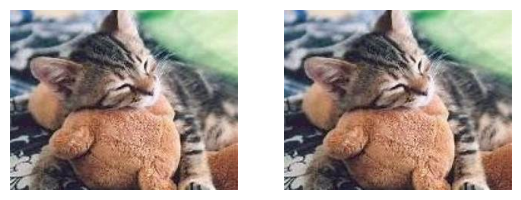

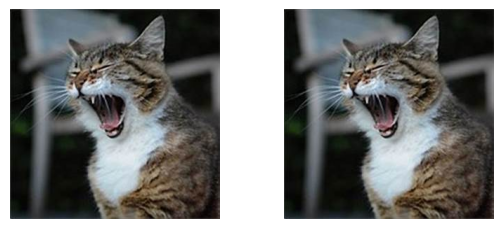

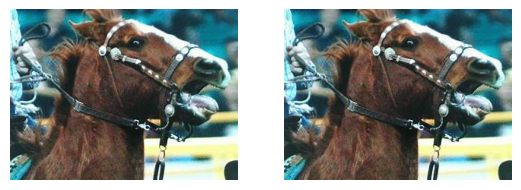

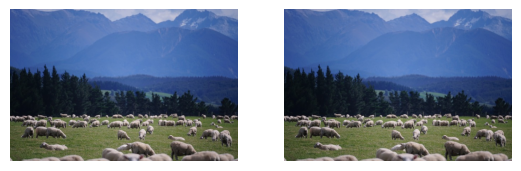

In [10]:
for bin in db.scan_duplicates():
    plt.figure(figsize=(10, 6))

    for i in range(len(bin)):
        plt.subplot(2, 3, i + 1)
        plt.imshow(bin[i].data)
        plt.axis("off")

    plt.show()

**Search for Similar Photos** \
The following cell is an example for searching similar – but not necessarily identical – photos.

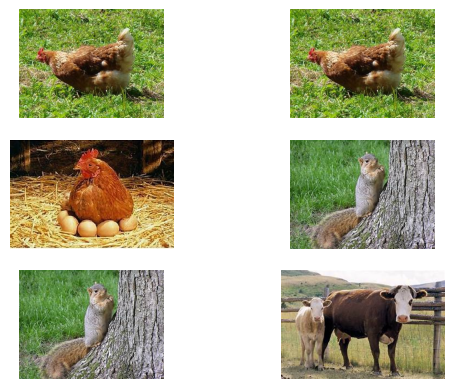

In [11]:
data = db.query_with_photo(results[0])
for i in range(len(data)):
    plt.subplot(3, len(data) // 3, i + 1)
    plt.imshow(data[i].data)
    plt.axis("off")

plt.show()

**Retrieve all images sorted by date**

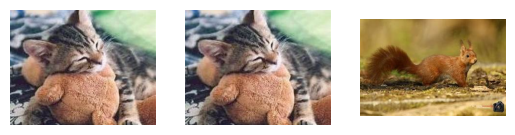

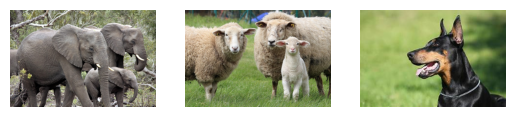

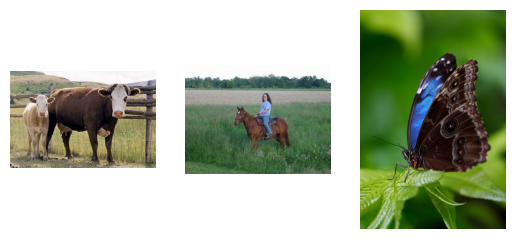

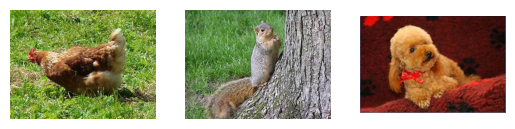

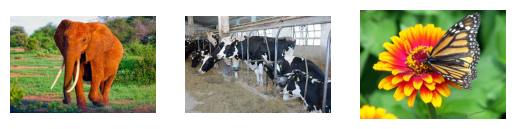

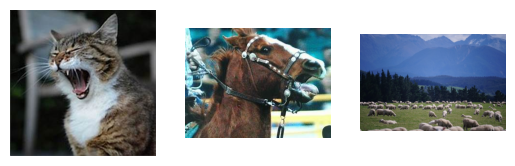

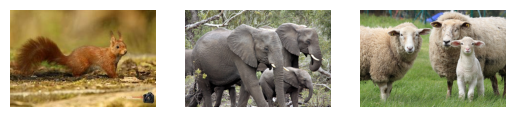

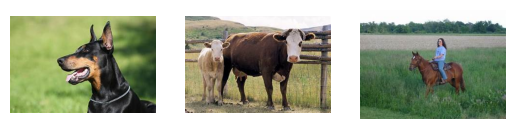

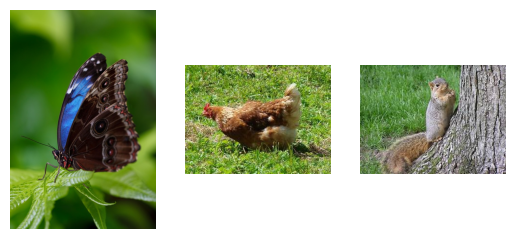

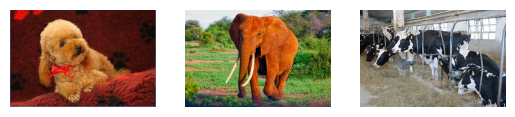

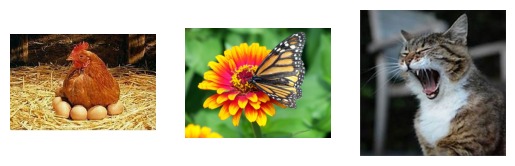

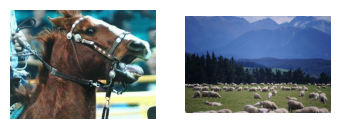

In [12]:
data = db.get_all_images(sorted=True)

for i in range((len(data) // 3) + 1):
    for j in range(i * 3, i * 3 + 3):
        if j < len(data):
            plt.subplot(1, 3, j - i * 3 + 1)
            plt.imshow(data[j].data)
            plt.axis("off")
    plt.show()